In [1]:
import pandas as pd
import json
import os
import numpy as np



In [2]:
df_train = pd.read_csv('/home/pangy/disk/cataracts_dataset/annotation/train_with_0.csv')
df_test = pd.read_csv('/home/pangy/disk/cataracts_dataset/annotation/val_with_0.csv')

In [3]:
df_all = pd.concat([df_train,df_test])

In [4]:
np.unique(df_all["label"])
pd.value_counts(df_all["label"])


0     260736
10    109471
8      99730
7      70647
18     69965
5      59986
15     59905
3      37125
14     36278
11     23507
4      23320
16     21876
6      20437
13     19829
9      17769
12     13329
2       6668
17      5310
1       1996
Name: label, dtype: int64

In [5]:
260736/sum(pd.value_counts(df_all["label"]))

0.2721999741095999

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline



In [7]:
#plt.style.use('seaborn')


In [8]:
num_to_label = { 
0:"background",
1:'Toric Marking',
2:'Implant Ejection', 
3:'Incision', 
4:'Viscodilatation', 
5:'Capsulorhexis', 
6:'Hydrodissetion',
7:'Nucleus Breaking', 
8:'Phacoemulsification', 
9:'Vitrectomy', 
10:'Irrigation/Aspiration', 
11:'Preparing Implant',
12:'Manual Aspiration', 
13:'Implantation', 
14:'Positioning', 
15:'OVD Aspiration', 
16:'Suturing', 
17:'Sealing Control',
18:'Wound Hydratation'}

In [9]:
label_count = df_all["label"].map(num_to_label).value_counts()

In [10]:
label_count.keys()

Index(['background', 'Irrigation/Aspiration', 'Phacoemulsification',
       'Nucleus Breaking', 'Wound Hydratation', 'Capsulorhexis',
       'OVD Aspiration', 'Incision', 'Positioning', 'Preparing Implant',
       'Viscodilatation', 'Suturing', 'Hydrodissetion', 'Implantation',
       'Vitrectomy', 'Manual Aspiration', 'Implant Ejection',
       'Sealing Control', 'Toric Marking'],
      dtype='object')

/home/pangy/disk/anaconda3/envs/tridet/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


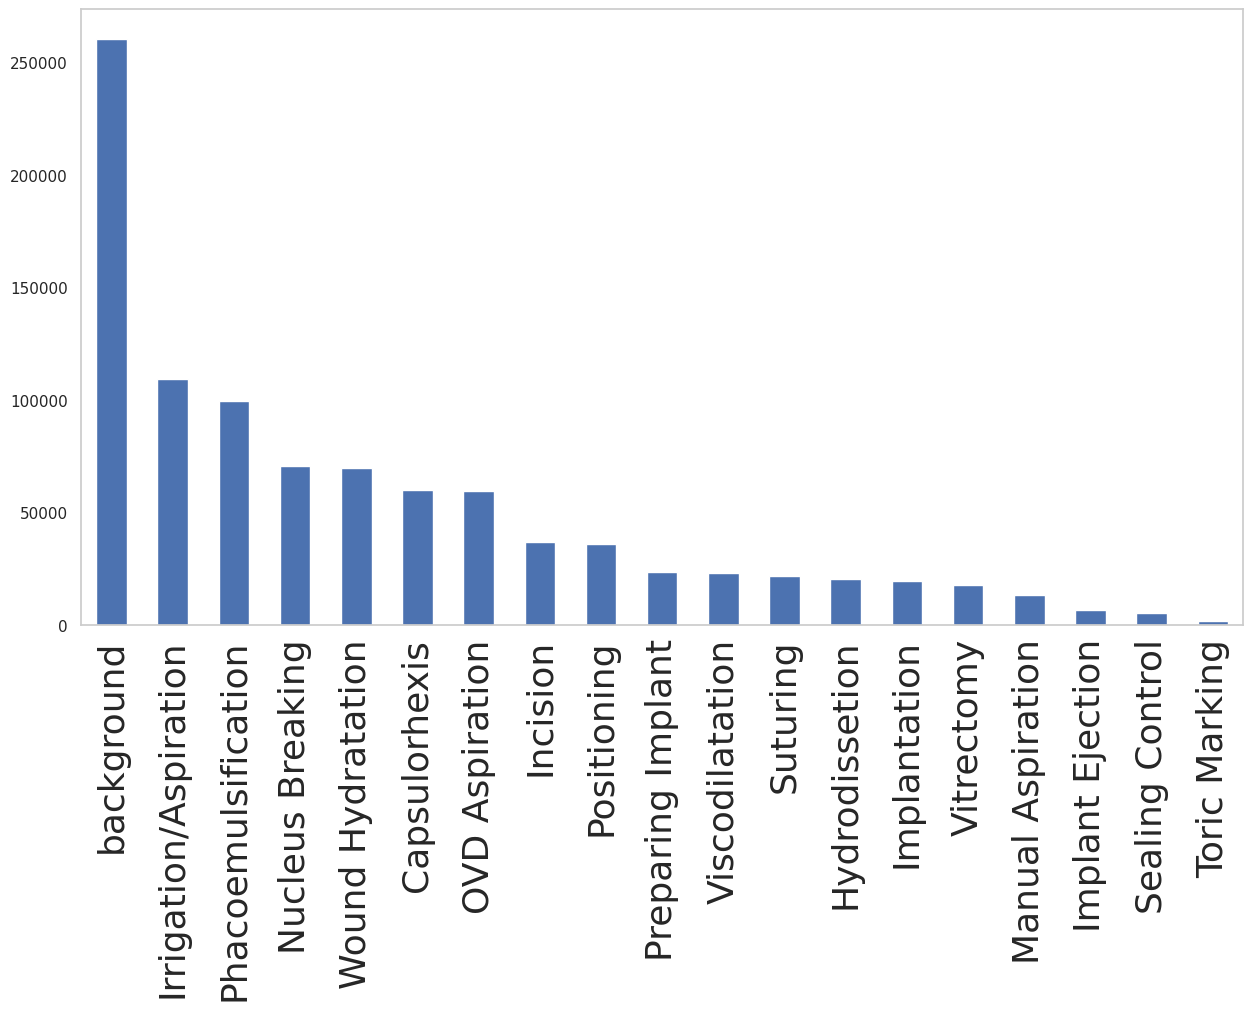

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")

# 创建图形对象，并设置背景颜色为白色，画布大小为宽度15英寸，高度8英寸
fig = plt.figure(facecolor='white', figsize=(15, 8))

# 绘制条形图
label_count.plot(kind="bar")
plt.grid(False)

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=26)  # 根据需要设置合适的字体大小

# 显示图形
plt.show()

In [12]:
data_dict = {}

In [13]:
grouped_train = df_train.groupby(["original_video_id"])
grouped_test = df_test.groupby(["original_video_id"])


In [14]:

data_db = {}
count = 0
for name, group in grouped_train:
    
    start_frame = int(group['frame_id'].min())/30
    end_frame = int(group['frame_id'].max())/30
    time_till_now = end_frame
    label = int(group["label"].mode().iloc[0])
    #classes = num_classes + 1 (background) with last category as background
    # e.g., num_classes = 10 -> 0, 1, ..., 9 as actions, 10 as background
    subset = "training"
    duration = end_frame-start_frame
    file_name = name
    data_db[file_name]={
        "start":start_frame,
        "end":end_frame,
        "label":label,
        "duration":duration,
        "subset":subset,
        "time_till_now":time_till_now
    }
    if label != 0:
        count+=1
print("train number : ",count)

count = 0
for name, group in grouped_test:

    start_frame = int(group['frame_id'].min())/30
    end_frame = int(group['frame_id'].max())/30
    time_till_now = end_frame
    label = int(group["label"].mode().iloc[0])
    subset = "testing"
    duration = end_frame-start_frame
    file_name = name
    data_db[file_name]={
        "start":start_frame,
        "end":end_frame,
        "label":label,
        "duration":duration,
        "subset":subset,
        "time_till_now":time_till_now
    }
    if label != 0:
        count+=1
print("test number : ",count)

train number :  371
test number :  374


In [15]:
data_db.keys()

dict_keys(['train01.mp4_582', 'train01.mp4_583', 'train01.mp4_584', 'train01.mp4_585', 'train01.mp4_586', 'train01.mp4_587', 'train01.mp4_588', 'train01.mp4_589', 'train01.mp4_590', 'train01.mp4_591', 'train01.mp4_592', 'train01.mp4_593', 'train01.mp4_594', 'train01.mp4_595', 'train01.mp4_596', 'train01.mp4_597', 'train01.mp4_598', 'train01.mp4_599', 'train01.mp4_600', 'train01.mp4_601', 'train01.mp4_602', 'train01.mp4_603', 'train01.mp4_604', 'train01.mp4_605', 'train01.mp4_606', 'train01.mp4_607', 'train01.mp4_608', 'train02.mp4_609', 'train02.mp4_610', 'train02.mp4_611', 'train02.mp4_612', 'train02.mp4_613', 'train02.mp4_614', 'train02.mp4_615', 'train02.mp4_616', 'train02.mp4_617', 'train02.mp4_618', 'train02.mp4_619', 'train02.mp4_620', 'train02.mp4_621', 'train02.mp4_622', 'train02.mp4_623', 'train02.mp4_624', 'train02.mp4_625', 'train02.mp4_626', 'train02.mp4_627', 'train02.mp4_628', 'train02.mp4_629', 'train02.mp4_630', 'train02.mp4_631', 'train02.mp4_632', 'train02.mp4_633', '

In [16]:
data_db_all = {}
for k,v in data_db.items():
    file_name  = k.split("_")[0]
    last_time = v["time_till_now"]

    if file_name not in data_db_all.keys():
        data_db_all[file_name] = {}
        data_db_all[file_name]["annotation"]= []
        data_db_all[file_name]["last_time"] = last_time
        if not v["label"] == 0:
            data_db_all[file_name]["annotation"].append(v)
    else:
        if last_time>data_db_all[file_name]["last_time"]:
            data_db_all[file_name]["last_time"] = last_time
        if not v["label"] == 0:
            data_db_all[file_name]["annotation"].append(v)


In [17]:
data_db_all

{'train01.mp4': {'annotation': [{'start': 1.4,
    'end': 16.4,
    'label': 3,
    'duration': 14.999999999999998,
    'subset': 'training',
    'time_till_now': 16.4},
   {'start': 31.466666666666665,
    'end': 35.36666666666667,
    'label': 4,
    'duration': 3.900000000000002,
    'subset': 'training',
    'time_till_now': 35.36666666666667},
   {'start': 40.266666666666666,
    'end': 69.13333333333334,
    'label': 5,
    'duration': 28.866666666666674,
    'subset': 'training',
    'time_till_now': 69.13333333333334},
   {'start': 73.2,
    'end': 82.63333333333334,
    'label': 6,
    'duration': 9.433333333333337,
    'subset': 'training',
    'time_till_now': 82.63333333333334},
   {'start': 91.06666666666666,
    'end': 132.16666666666666,
    'label': 7,
    'duration': 41.099999999999994,
    'subset': 'training',
    'time_till_now': 132.16666666666666},
   {'start': 133.53333333333333,
    'end': 161.66666666666666,
    'label': 8,
    'duration': 28.133333333333326,
 

In [18]:


with open('data_1106.json', 'w') as f:
    json.dump(data_db_all, f)

In [19]:
with open("data_1106.json") as f:
    temp = json.load(f)

In [20]:
temp

{'train01.mp4': {'annotation': [{'start': 1.4,
    'end': 16.4,
    'label': 3,
    'duration': 14.999999999999998,
    'subset': 'training',
    'time_till_now': 16.4},
   {'start': 31.466666666666665,
    'end': 35.36666666666667,
    'label': 4,
    'duration': 3.900000000000002,
    'subset': 'training',
    'time_till_now': 35.36666666666667},
   {'start': 40.266666666666666,
    'end': 69.13333333333334,
    'label': 5,
    'duration': 28.866666666666674,
    'subset': 'training',
    'time_till_now': 69.13333333333334},
   {'start': 73.2,
    'end': 82.63333333333334,
    'label': 6,
    'duration': 9.433333333333337,
    'subset': 'training',
    'time_till_now': 82.63333333333334},
   {'start': 91.06666666666666,
    'end': 132.16666666666666,
    'label': 7,
    'duration': 41.099999999999994,
    'subset': 'training',
    'time_till_now': 132.16666666666666},
   {'start': 133.53333333333333,
    'end': 161.66666666666666,
    'label': 8,
    'duration': 28.133333333333326,
 

In [21]:
duration_list = []
for k,v in temp.items():
    for i in v["annotation"]:
        duration_list.append(i["duration"])

In [22]:
np.mean(duration_list)

31.15897091722595

In [23]:
label_list = []
for k,v in temp.items():
    print(k)
    for i in v["annotation"]:
        label_list.append(i["label"])

train01.mp4
train02.mp4
train03.mp4
train04.mp4
train05.mp4
train06.mp4
train07.mp4
train08.mp4
train09.mp4
train10.mp4
train11.mp4
train12.mp4
train13.mp4
train14.mp4
train15.mp4
train16.mp4
train17.mp4
train18.mp4
train19.mp4
train20.mp4
train21.mp4
train22.mp4
train23.mp4
train24.mp4
train25.mp4
test01.mp4
test02.mp4
test03.mp4
test04.mp4
test05.mp4
test06.mp4
test07.mp4
test08.mp4
test09.mp4
test10.mp4
test11.mp4
test12.mp4
test13.mp4
test14.mp4
test15.mp4
test16.mp4
test17.mp4
test18.mp4
test19.mp4
test20.mp4
test21.mp4
test22.mp4
test23.mp4
test24.mp4
test25.mp4


In [24]:
len(label_list)

745

In [25]:
from collections import Counter

label_counter =Counter(label_list)

In [26]:
label_dict = {num_to_label[key]:value for key,value in dict(label_counter).items()}

In [27]:
label_series = pd.Series(label_dict)

In [48]:
selected_labels = ["Viscodilatation","Incision","Irrigation/Aspiration","Sealing Control","Implant Ejection"]

In [89]:
label_series.index 

Index(['Incision', 'Viscodilatation', 'Capsulorhexis', 'Hydrodissetion',
       'Nucleus Breaking', 'Phacoemulsification', 'Irrigation/Aspiration',
       'Preparing Implant', 'Implantation', 'Positioning', 'OVD Aspiration',
       'Wound Hydratation', 'Sealing Control', 'Implant Ejection', 'Suturing',
       'Manual Aspiration', 'Vitrectomy', 'Toric Marking'],
      dtype='object')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

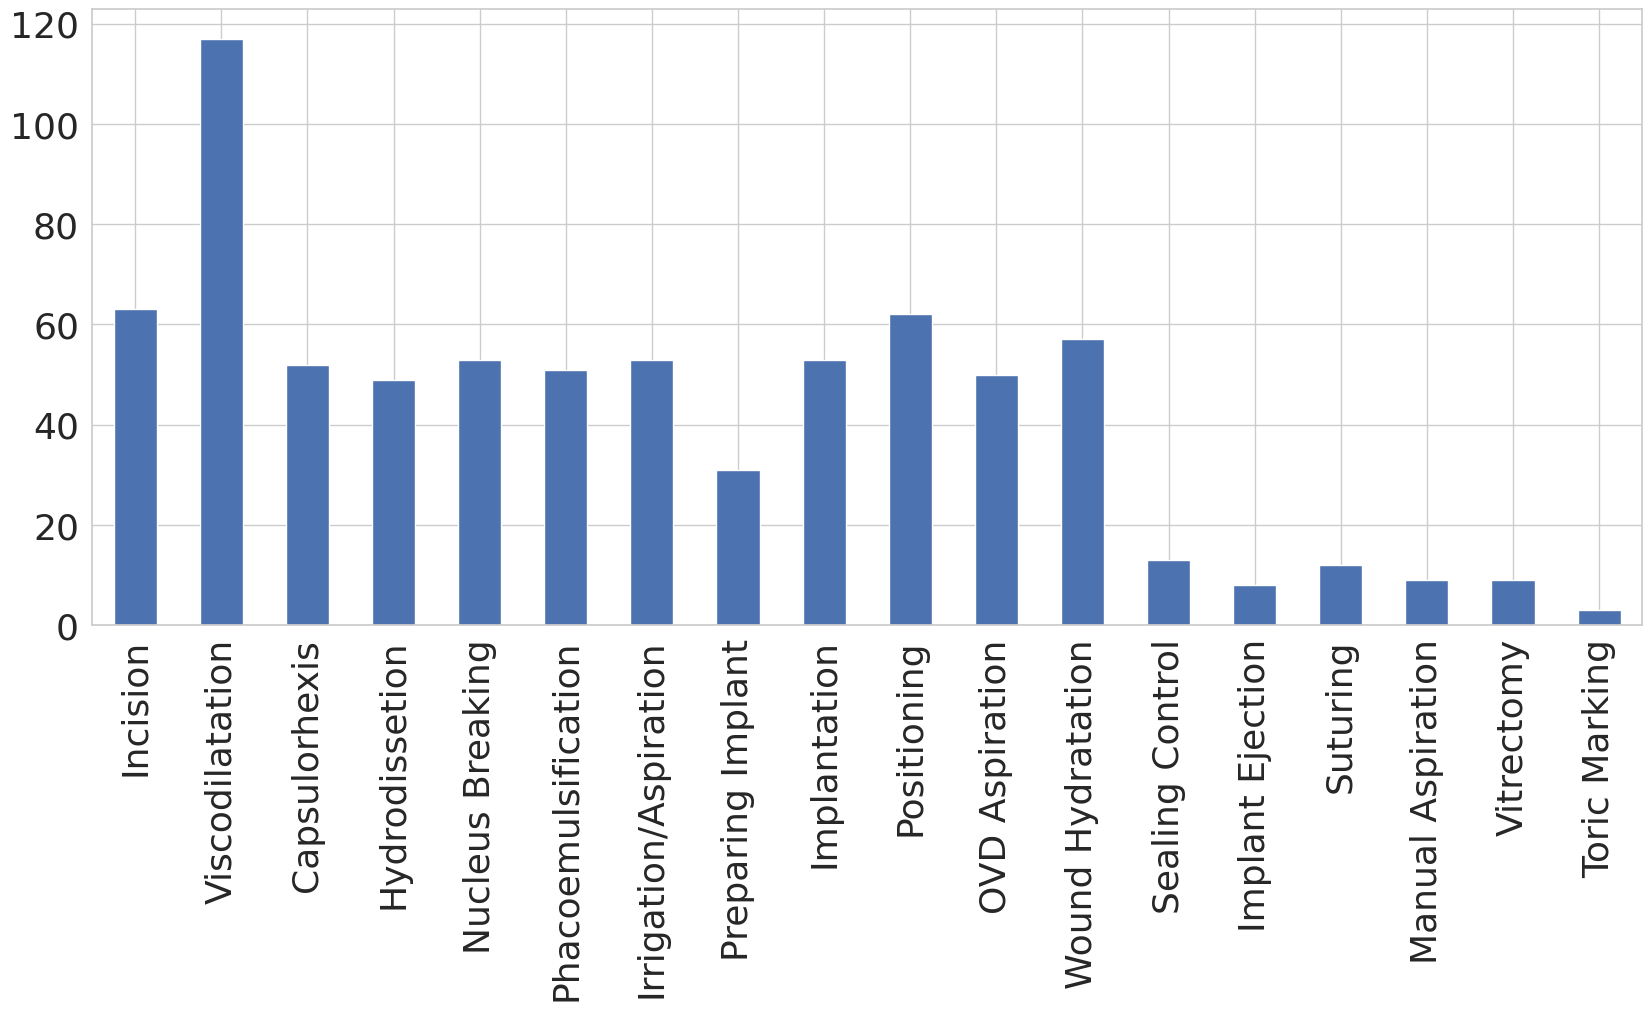

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import *
from PIL import Image
from collections import OrderedDict

# 设置Seaborn样式
color_map = plt.cm.tab20 

# 创建图形对象，并设置背景颜色为白色，画布大小为宽度15英寸，高度8英寸
fig = plt.figure(facecolor='white', figsize=(20, 8))

# 绘制条形图，将x轴标签改为数字序列
ax = label_series.plot(kind="bar", fontsize=26)
labels = label_series.index 
patches = [mpatches.Patch(color=color_map(i)) for i in labels]
ax.legend(labels = [num_to_label[i] for i in labels],handles=patches, loc='upper left', bbox_to_anchor=(1, 1))
# 关闭网格线
plt.grid(False)

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=26)  # 根据需要设置合适的字体大小

# 显示图形
plt.show()

In [105]:
num_to_label = { 
        0:"background",
        1:'Toric Marking', #
        2:'Implant Ejection', #
        3:'Incision', 
        4:'Viscodilatation', 
        5:'Capsulorhexis', 
        6:'Hydrodissetion',
        7:'Nucleus Breaking', 
        8:'Phacoemulsification', 
        9:'Vitrectomy',  #
        10:'Irrigation/Aspiration', 
        11:'Preparing Implant',
        12:'Manual Aspiration',  #
        13:'Implantation', 
        14:'Positioning', 
        15:'OVD Aspiration', 
        16:'Suturing',  #
        17:'Sealing Control', #
        18:'Wound Hydratation'}

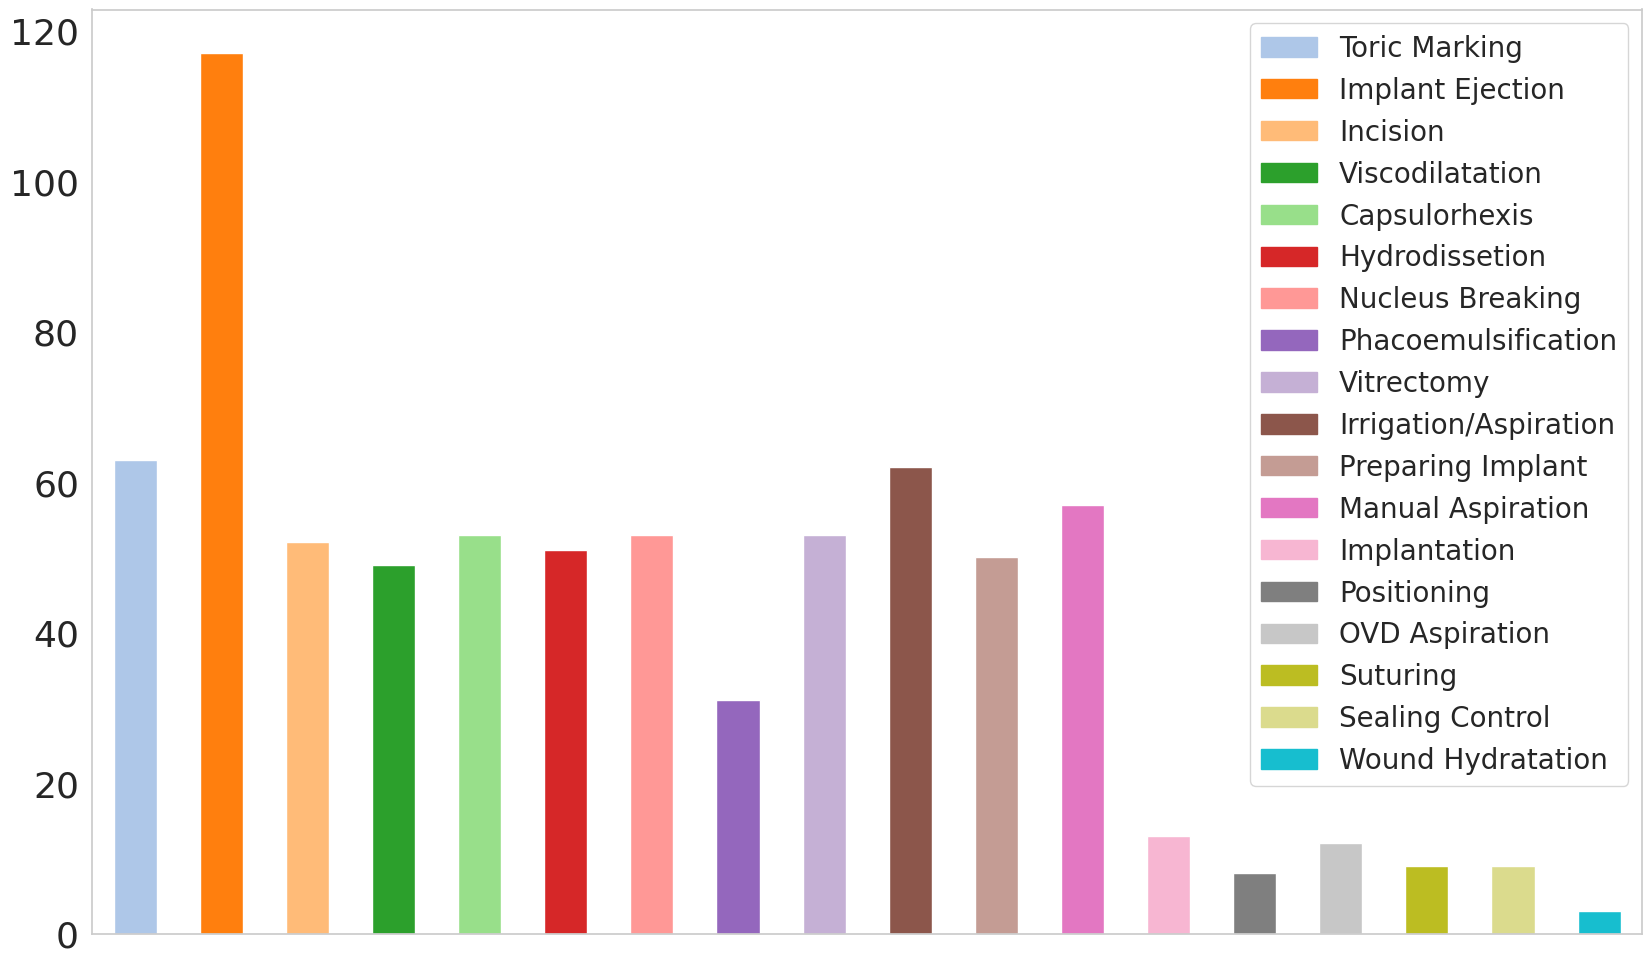

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import *
from PIL import Image
from collections import OrderedDict


# 设置Seaborn样式
sns.set(style="whitegrid")

color_map = plt.cm.tab20 
colors = [color_map(i) for i in range(1,len(label_series)+1)]

# 创建图形对象，并设置背景颜色为白色，画布大小为宽度15英寸，高度8英寸
fig = plt.figure(facecolor='white', figsize=(20, 12))

# 绘制条形图
label_series.plot(kind="bar",fontsize=26,color=colors)


plt.grid(False)

# 设置x轴刻度标签的字体大小
plt.xticks([])
patches = [mpatches.Patch(color=color_map(i)) for i in range(1,len(label_series)+1)]
plt.legend(labels = [num_to_label[i] for i in range(1,len(label_series)+1)],handles=patches, bbox_to_anchor=(1, 1),fontsize=20)
# 显示图形
plt.show()



<Figure size 640x480 with 0 Axes>

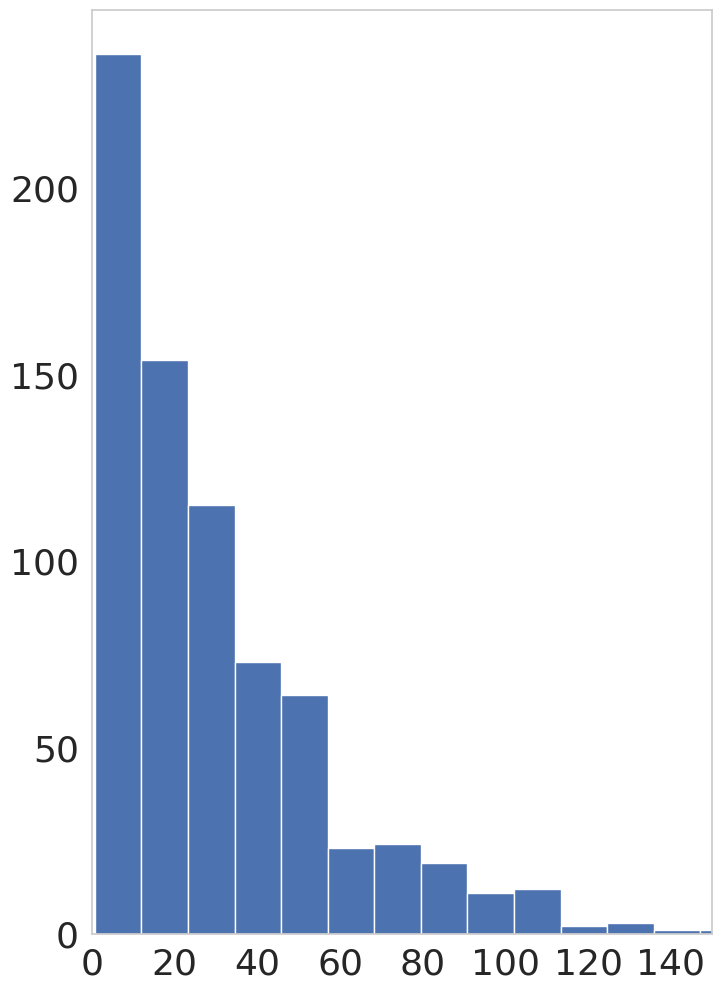

In [127]:
"""
plt.hist(duration_list,bins=30)
plt.xlabel('Duration')
plt.ylabel('Count')"""

import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure()

# 创建图形对象，并设置背景颜色为白色，画布大小为宽度15英寸，高度8英寸
fig = plt.figure(facecolor='white', figsize=(8, 12))

# 绘制条形图
plt.hist(duration_list,bins=30)
plt.grid(False)

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=26)  # 根据需要设置合适的字体大小
plt.yticks(fontsize=26)

plt.xlim([0,150])
# 显示图形
plt.show()

(array([236., 154., 115.,  73.,  64.,  23.,  24.,  19.,  11.,  12.,   2.,
          3.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.63333333,  11.90333333,  23.17333333,  34.44333333,
         45.71333333,  56.98333333,  68.25333333,  79.52333333,
         90.79333333, 102.06333333, 113.33333333, 124.60333333,
        135.87333333, 147.14333333, 158.41333333, 169.68333333,
        180.95333333, 192.22333333, 203.49333333, 214.76333333,
        226.03333333, 237.30333333, 248.57333333, 259.84333333,
        271.11333333, 282.38333333, 293.65333333, 304.92333333,
        316.19333333, 327.46333333, 338.73333333]),
 <BarContainer object of 30 artists>)

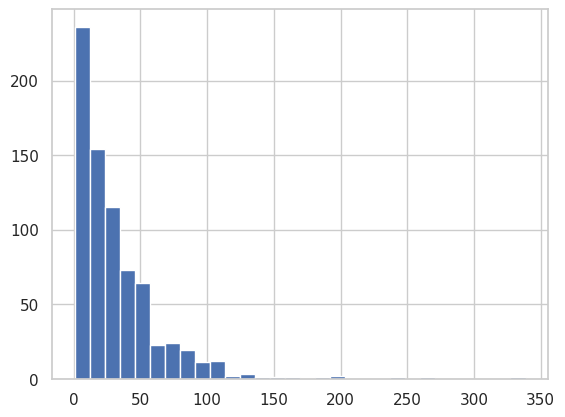

In [70]:
plt.hist(duration_list,bins=30)

In [74]:
pd.Series(duration_list).to_csv("temp.csv")

In [72]:
duration_list.to_csv("temp.csv")

AttributeError: 'list' object has no attribute 'to_csv'

In [30]:
for k,v in temp.items():
    duration_total = 0
    for i in v:
        duration_total += i["duration"]

TypeError: string indices must be integers

In [ ]:
label_dict = None
num_classes = 18
default_fps = None
with open("data_train.json") as f:
    json_data = json.load(f)
# if label_dict is not available, matching label(str) to label id (int)
if label_dict is None:
    label_dict = {
    #define surgical phase name to phase label id
        "phase_{}".format(i):i for i in range(num_classes)
    }
    

# fill in the db (immutable afterwards)
dict_db = tuple()
for key, value in json_data.items():
    # key is the video id, v is the segement information
    # get fps if available
    if default_fps is not None:
        fps = default_fps
    else:
        fps = 30

    duration = 0
    num_phase = len(value)
    segments = np.zeros([num_phase, 2], dtype=np.float32)
    labels = np.zeros([num_phase, ], dtype=np.int64)
    for idx,phase in enumerate(value):
        duration += phase["duration"]
        segments[idx][0] = phase["start_frame"]
        segments[idx][1] = phase["end_frame"]
        if num_classes == 1:
            labels[idx] = 0
        else:
            labels[idx] = phase["label"]

    dict_db += ({'id': key,
                    'fps': fps,
                    'duration': duration,
                    'segments': segments,
                    'labels': labels
                    },)


In [ ]:
dict_db[2]

{'id': 'train03.mp4',
 'fps': 30,
 'duration': 17490,
 'segments': array([[1.0000e+00, 1.5100e+03],
        [1.5110e+03, 1.9120e+03],
        [1.9130e+03, 2.1190e+03],
        [2.1200e+03, 2.1910e+03],
        [2.1920e+03, 2.5340e+03],
        [2.5350e+03, 3.2590e+03],
        [3.2600e+03, 3.3550e+03],
        [3.3560e+03, 3.7020e+03],
        [3.7030e+03, 4.6550e+03],
        [4.6560e+03, 5.8960e+03],
        [5.8970e+03, 5.9070e+03],
        [5.9080e+03, 7.0050e+03],
        [7.0060e+03, 7.6830e+03],
        [7.6840e+03, 1.0705e+04],
        [1.0706e+04, 1.0889e+04],
        [1.0890e+04, 1.1003e+04],
        [1.1004e+04, 1.1111e+04],
        [1.1112e+04, 1.1524e+04],
        [1.1525e+04, 1.1696e+04],
        [1.1697e+04, 1.2631e+04],
        [1.2632e+04, 1.2763e+04],
        [1.2764e+04, 1.5388e+04],
        [1.5389e+04, 1.5530e+04],
        [1.5531e+04, 1.7172e+04],
        [1.7173e+04, 1.7490e+04]], dtype=float32),
 'labels': array([ 0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,  

In [ ]:
feat = np.load("/home/pangy/disk/LUO/slowfast/feature_extract/output_features/train01_32.npy")

In [ ]:
len(feat)

14380

In [ ]:
len(feat[0])

2304

In [ ]:
with open("/home/pangy/disk/LUO/TriDet/data/cataract/data.json") as f:
    temp = json.load(f)

In [ ]:
for k, v in temp.items():
    if "test" in k:
        print(v[0])

{'start_frame': 1, 'end_frame': 113, 'label': 0, 'duration': 113, 'subset': 'testing'}


In [ ]:
from torch.nn import functional as F
import torch

In [ ]:
a = torch.tensor([13,14,15,18])

In [ ]:
F.one_hot(torch.tensor([13,14,15,17]),18)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
def load_gt_seg_from_json(json_file, split=None, label='label', label_offset=0):
    # load json file
    with open(json_file, "r", encoding="utf8") as f:
        json_db = json.load(f)

    vids, starts, stops, labels = [], [], [], []
    if split == "training":
        split_name = "train"
    else:
        split_name = "test"
    for k, v in json_db.items():

        for segments in v:
            if split_name not in segments["subset"]:
                continue
            ants = segments
            vids.append(k.split(".")[0])
            starts.append(segments["start"])
            stops.append(segments["end"])
            labels.append(segments["label"])



        """# filter based on split
        if split_name not in k:
            continue
        # remove duplicated instances
        ants = v
        # video id
        vids += [k] * len(ants)
        # for each event, grab the start/end time and label
        for event in ants:
            starts += [float(event['start'])]
            stops += [float(event['end'])]
            if isinstance(event[label], (Tuple, List)):
                # offset the labels by label_offset
                label_id = 0
                for i, x in enumerate(event[label][::-1]):
                    label_id += label_offset ** i + int(x)
            else:
                # load label_id directly
                label_id = int(event[label])
            labels += [label_id]"""

    # move to pd dataframe
    gt_base = pd.DataFrame({
        'video-id': vids,
        't-start': starts,
        't-end': stops,
        'label': labels
    })

    return gt_base

In [ ]:
df = load_gt_seg_from_json("/home/pangy/disk/LUO/TriDet/data/cataract/data_1030.json",split="test")

In [ ]:
df

,video-id,t-start,t-end,label
0,test02,3.766667,58.800000,3
1,test02,486.566667,728.833333,8
2,test02,791.900000,873.633333,9
3,test02,900.133333,1011.300000,8
4,test02,1019.866667,1036.133333,4
5,test02,1050.566667,1188.533333,10
6,test02,1214.366667,1227.000000,4
7,test02,1231.933333,1241.933333,3
8,test02,1253.366667,1264.633333,4
9,test02,1366.233333,1384.900000,11


In [ ]:
from typing import List
from typing import Tuple
from typing import Dict
def remove_duplicate_annotations(ants, tol=1e-3):
    # remove duplicate annotations (same category and starting/ending time)
    valid_events = []
    for event in ants:
        s, e, l = event['segment'][0], event['segment'][1], event['label_id']
        valid = True
        for p_event in valid_events:
            if ((abs(s - p_event['segment'][0]) <= tol)
                    and (abs(e - p_event['segment'][1]) <= tol)
                    and (l == p_event['label_id'])
            ):
                valid = False
                break
        if valid:
            valid_events.append(event)
    return valid_events


def load_gt_seg_from_json(json_file, split=None, label='label_id', label_offset=0):
    # load json file
    with open(json_file, "r", encoding="utf8") as f:
        json_db = json.load(f)
    json_db = json_db['database']

    vids, starts, stops, labels = [], [], [], []
    for k, v in json_db.items():

        # filter based on split
        if (split is not None) and v['subset'].lower() != split:
            continue
        # remove duplicated instances
        ants = remove_duplicate_annotations(v['annotations'])
        # video id
        vids += [k] * len(ants)
        # for each event, grab the start/end time and label
        for event in ants:
            starts += [float(event['segment'][0])]
            stops += [float(event['segment'][1])]
            if isinstance(event[label], (Tuple, List)):
                # offset the labels by label_offset
                label_id = 0
                for i, x in enumerate(event[label][::-1]):
                    label_id += label_offset ** i + int(x)
            else:
                # load label_id directly
                label_id = int(event[label])
            labels += [label_id]

    # move to pd dataframe
    gt_base = pd.DataFrame({
        'video-id': vids,
        't-start': starts,
        't-end': stops,
        'label': labels
    })

    return gt_base

In [ ]:
load_gt_seg_from_json("/home/pangy/disk/LUO/TriDet/data/hacs/annotations/HACS_segments_v1.1.1_slowfast.json")[:1000]

,video-id,t-start,t-end,label
0,--0edUL8zmA,5.40,11.60,0
1,--0edUL8zmA,12.60,88.16,0
2,--8jh-DkPK4,18.31,21.85,1
3,--8jh-DkPK4,25.31,29.99,1
4,--8jh-DkPK4,30.66,35.40,1
...,...,...,...,...
995,-WUHQsnN34g,22.47,102.76,16
996,-WqHRm1rgak,12.44,76.45,104
997,-WqHRm1rgak,79.50,97.66,104
998,-WqHRm1rgak,100.67,119.96,104
